In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.regularizers import l1
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [168]:
mnist = np.load('/content/drive/MyDrive/ML/ML Dataset/mnist.npz')

In [169]:
X_train = mnist['x_train']
y_train = mnist['y_train']
X_test = mnist['x_test']
y_test = mnist['y_test']

In [170]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [171]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Text(0.5, 1.0, '3')

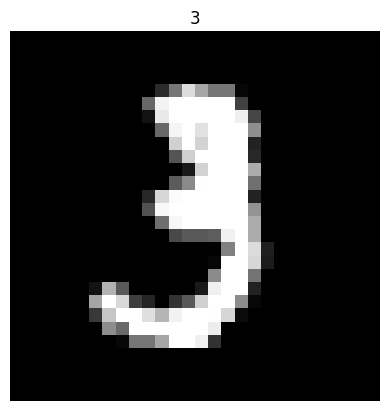

In [172]:
plt.imshow(X_train[10], cmap='gray')
plt.axis('off')
plt.title(y_train[10])

In [173]:
model = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(units = 64, activation = 'relu', kernel_regularizer = l1(0.01)),
    Dropout(0.5),
    Dense(units = 10, activation = 'softmax')
])

In [174]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_27 (Dense)            (None, 64)                50240     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_28 (Dense)            (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [175]:
early_stopping = EarlyStopping(
    monitor = 'val_loss',
    patience = 3,
    restore_best_weights = True
)

In [176]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [177]:
history = model.fit(X_train,
        y_train,
        validation_split = 0.2,
        callbacks = [early_stopping],
        epochs = 30
        )

Epoch 1/30
1500/1500 [==============================] - 16s 10ms/step - loss: 11.1806 - accuracy: 0.3045 - val_loss: 5.0819 - val_accuracy: 0.5258
Epoch 2/30
1500/1500 [==============================] - 14s 10ms/step - loss: 3.8101 - accuracy: 0.4060 - val_loss: 2.8561 - val_accuracy: 0.5813
Epoch 3/30
1500/1500 [==============================] - 6s 4ms/step - loss: 3.1053 - accuracy: 0.4470 - val_loss: 2.5424 - val_accuracy: 0.6852
Epoch 4/30
1500/1500 [==============================] - 6s 4ms/step - loss: 3.0674 - accuracy: 0.4672 - val_loss: 2.4018 - val_accuracy: 0.7197
Epoch 5/30
1500/1500 [==============================] - 5s 3ms/step - loss: 2.7602 - accuracy: 0.5034 - val_loss: 2.1466 - val_accuracy: 0.7929
Epoch 6/30
1500/1500 [==============================] - 5s 4ms/step - loss: 2.7173 - accuracy: 0.5176 - val_loss: 2.2392 - val_accuracy: 0.7988
Epoch 7/30
1500/1500 [==============================] - 6s 4ms/step - loss: 2.5111 - accuracy: 0.5393 - val_loss: 2.2007 - val_accu

Text(0.5, 1.0, 'Accuracy vs Epochs')

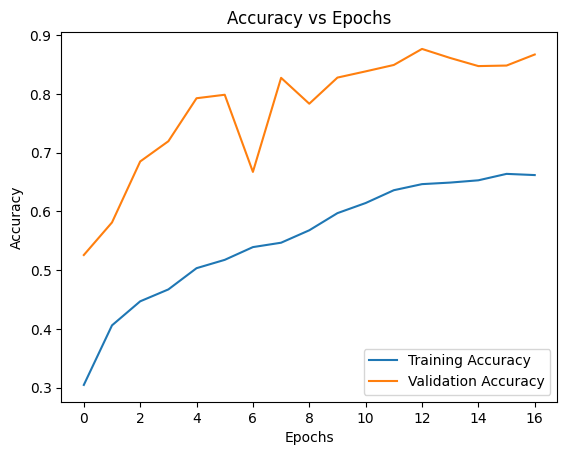

In [178]:
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')

Text(0.5, 1.0, 'Loss vs Epochs')

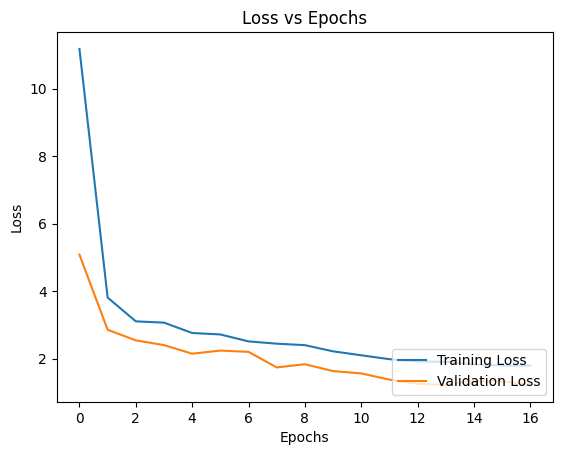

In [179]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend(loc = 'lower right')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')

In [180]:
y_pred = model.predict(X_test)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[2.3887076e-10, 9.1518321e-12, 6.1778213e-05, ..., 9.9993473e-01,
        2.5003191e-10, 2.0401096e-06],
       [3.9623171e-04, 1.9058440e-02, 8.8565177e-01, ..., 6.1207344e-03,
        4.1359719e-02, 1.8096496e-05],
       [2.4004687e-11, 9.9113613e-01, 3.7791920e-03, ..., 4.3853782e-03,
        4.1991862e-04, 3.1869149e-05],
       ...,
       [6.4168084e-09, 6.9890876e-07, 3.3482260e-04, ..., 4.1486949e-02,
        3.2895210e-04, 2.6780125e-01],
       [8.6733764e-03, 5.5600949e-02, 3.9942540e-02, ..., 1.6667487e-02,
        4.5589471e-01, 8.1853718e-02],
       [1.6121418e-05, 3.0027625e-09, 3.9561909e-02, ..., 5.3831724e-07,
        1.3829522e-05, 1.1699637e-05]], dtype=float32)

In [181]:
y_pred = y_pred.argmax(axis = 1)
y_pred

array([7, 2, 1, ..., 4, 8, 6])

In [182]:
accuracy_score(y_test, y_pred)

0.8561

In [183]:
confusion_matrix(y_test, y_pred)

array([[ 951,    0,    3,    0,    1,    0,    1,   17,    7,    0],
       [   0, 1106,    4,    3,    0,    1,    9,    3,    9,    0],
       [   9,    6,  910,   41,    8,    0,   13,   32,   13,    0],
       [   4,    3,   46,  883,    0,   23,    1,   22,   23,    5],
       [   2,    0,    8,    0,  873,    2,   18,    6,    8,   65],
       [  51,   11,    5,  178,    5,  448,   25,   14,  147,    8],
       [  24,    3,   11,    0,   26,    3,  870,    1,   20,    0],
       [   2,   18,   32,    3,    6,    0,    0,  953,    3,   11],
       [  31,   17,   18,    9,    3,   12,   38,   10,  816,   20],
       [   8,    5,    3,    9,  116,   11,    1,   98,    7,  751]])

In [184]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       980
           1       0.95      0.97      0.96      1135
           2       0.88      0.88      0.88      1032
           3       0.78      0.87      0.83      1010
           4       0.84      0.89      0.86       982
           5       0.90      0.50      0.64       892
           6       0.89      0.91      0.90       958
           7       0.82      0.93      0.87      1028
           8       0.77      0.84      0.81       974
           9       0.87      0.74      0.80      1009

    accuracy                           0.86     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.86      0.85     10000

